# Gutzwiller for triangular lattice

We are doing specifically $N=4$ so I will not have $N$ dependence as in the square lattice case.

# Single Particle Solution

In [1]:
import qiskit.quantum_info as qi
import scipy as sp
import numpy as np
import pandas as pd
import math
import scipy.linalg as ln


def Mdot(Ol):
    L = len(Ol)
    out = Ol[L-1]
    for i in range(1,len(Ol)):
        out = np.dot(Ol[L-1-i],out)
    return out

def bkt(y1,O,y2):
    return Mdot([np.conjugate(y1),O,y2])

In [2]:
def Ks(k):
    h = [[0 for i in range(4)] for ii in range(4)]
    h[0][1] = -k; h[0][2] = -k; h[0][3] = -k;
    h[1][0] = -k; h[1][2] = -k; h[1][3] = -k;
    h[2][0] = -k; h[2][1] = -k; h[2][3] = -k;
    h[3][0] = -k; h[3][1] = -k; h[3][2] = -k;
    return h

In [3]:
e,y = ln.eigh(Ks(1))
F = np.transpose(y)
Fd = np.conjugate(np.transpose(F))

In [4]:
Mdot([Ks(2),F[0]])-bkt(F[0],Ks(2),F[0])*F[0]

array([-8.8817842e-16,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00])

In [5]:
Mdot([F,Ks(2),np.transpose(np.conjugate(F))])

array([[-6.00000000e+00,  6.66133815e-16, -1.22124533e-15,
         0.00000000e+00],
       [ 7.21644966e-16,  2.00000000e+00, -1.40847040e-16,
        -3.49073731e-16],
       [-6.66133815e-16, -1.01524020e-16,  2.00000000e+00,
         1.47214867e-17],
       [ 0.00000000e+00, -3.30025315e-16, -1.38511368e-17,
         2.00000000e+00]])

# Many Body

In [6]:
def I(N):
    label = ['I' for i in range(N)]
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def X(i,N):
    label = ['I' for i in range(N)]
    label[N-1-i] = 'X'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def Y(i,N):
    label = ['I' for i in range(N)]
    label[N-1-i] = 'Y'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def Z(i,N):
    label = ['I' for i in range(N)]
    label[N-1-i] = 'Z'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def c(i,N):
    label_1 = ['Z' for j in range(N-i-1)]
    label_2 = ['I' for j in range(N-i,N)]
    label_x = label_1 + ['X'] + label_2
    label_y = label_1 + ['Y'] + label_2
    label_x = ''.join(label_x)
    label_y = ''.join(label_y)
    x = qi.Operator.from_label(label_x).data
    y = qi.Operator.from_label(label_y).data
    return 1/2*(x+1j*y)

def cd(i,N):
    label_1 = ['Z' for j in range(N-i-1)]
    label_2 = ['I' for j in range(N-i,N)]
    label_x = label_1 + ['X'] + label_2
    label_y = label_1 + ['Y'] + label_2
    label_x = ''.join(label_x)
    label_y = ''.join(label_y)
    x = qi.Operator.from_label(label_x).data
    y = qi.Operator.from_label(label_y).data
    return 1/2*(x-1j*y)

def n(i,N):
    return Mdot([cd(i,N),c(i,N)])

def ad(n,N):
    out = Fd[0][n]*cd(0,N)
    for i in range(1,N):
        out = out + Fd[i][n]*cd(i,N)
    return out

def a(n,N):
    out = F[n][0]*c(0,N)
    for i in range(1,N):
        out = out + F[n][i]*c(i,N)
    return out

In [7]:
def K(k):
    Kout = 0*I(8)
    Kout = Kout + Mdot([cd(0,8),c(1,8)]) + Mdot([cd(0,8),c(2,8)])+ Mdot([cd(0,8),c(3,8)])
    Kout = Kout + Mdot([cd(1,8),c(0,8)]) + Mdot([cd(1,8),c(2,8)])+ Mdot([cd(1,8),c(3,8)])
    Kout = Kout + Mdot([cd(2,8),c(0,8)]) + Mdot([cd(2,8),c(1,8)])+ Mdot([cd(2,8),c(3,8)])
    Kout = Kout + Mdot([cd(3,8),c(0,8)]) + Mdot([cd(3,8),c(1,8)])+ Mdot([cd(3,8),c(2,8)])
    N=4
    Kout = Kout + Mdot([cd(N+0,8),c(N+1,8)]) + Mdot([cd(N+0,8),c(N+2,8)])+ Mdot([cd(N+0,8),c(N+3,8)])
    Kout = Kout + Mdot([cd(N+1,8),c(N+0,8)]) + Mdot([cd(N+1,8),c(N+2,8)])+ Mdot([cd(N+1,8),c(N+3,8)])
    Kout = Kout + Mdot([cd(N+2,8),c(N+0,8)]) + Mdot([cd(N+2,8),c(N+1,8)])+ Mdot([cd(N+2,8),c(N+3,8)])
    Kout = Kout + Mdot([cd(N+3,8),c(N+0,8)]) + Mdot([cd(N+3,8),c(N+1,8)])+ Mdot([cd(N+3,8),c(N+2,8)])
    return k*Kout

def G(g):
    N=4
    out = I(2*N)
    for i in range(N):
        out = Mdot([ out , I(2*N) + (np.exp(-g)-1)*Mdot([n(i,2*N),n(i+N,2*N)]) ])
    return out

def D(d):
    N=4
    Dout = 0*I(2*N)
    for i in range(0,N):
        Dout = Dout + Mdot([n(i,2*N),n(i+N,2*N)])
    return d*Dout

def M(u):
    N=4
    Dout = 0*I(2*N)
    for i in range(0,N):
        Dout = Dout + n(i,2*N) 
        Dout = Dout + n(i+N,2*N)
    return u*Dout



In [8]:
def psi0(N):
    y = [0 for i in range(2**N)]
    y[0] = 1
    return y

psi1 = Mdot([ad(3,4),ad(2,4),psi0(4)])
psi_spin = np.kron(psi1,psi1)

In [9]:
k=1.3
np.amax(np.abs( Mdot([K(k),psi_spin]) - Mdot([np.conjugate(psi_spin),K(k),psi_spin])*psi_spin ))

6.661338147750939e-16

# Find the rotations that diagonalize F

In [10]:
def ry(i,j,phi,N):
    M = (1+0*1j)*np.identity(N)
    M[i,i] = np.cos(phi)
    M[j,j] = np.cos(phi)
    M[i,j] = np.sin(phi)
    M[j,i] = -np.sin(phi)
    return M

def rz(j,phi,N):
    M = (1+0*1j)*np.identity(N)
    M[j,j] = np.exp(1j*phi)
    return M

def givens(i,j,F):
    if F[j,i] > 0:
        phiz = 1j*np.log( F[j,i]/F[i,i] * np.abs(F[i,i])/np.abs(F[j,i]) +1j*0)
        Fz =  Mdot([rz(j,phiz,4) , F])
    else:
        Fz=F
        phiz = 0
    phi = np.arctan(Fz[j,i]/Fz[i,i])
    F_new = Mdot([ry(i,j,phi,4) , Fz])
    return F_new,phiz,phi

In [11]:
F1,pz1,p1 = givens(0,3,F)
F2,pz2,p2 = givens(0,2,F1)
F3,pz3,p3 = givens(0,1,F2)
F4,pz4,p4 = givens(1,3,F3)
F5,pz5,p5 = givens(1,2,F4)
F6,pz6,p6 = givens(2,3,F5)
pd.DataFrame( F6 )

,0,1,2,3
0,-1.000000e+00-9.184851e-17j,1.166819e-17+6.123234e-17j,1.166819e-17+6.123234e-17j,1.166819e-17+6.123234e-17j
1,8.587605e-18-2.629196e-34j,1.000000e+00+1.779098e-33j,3.856319e-16+3.558196e-33j,1.635873e-16+3.558196e-33j
2,8.587605e-18-2.629196e-34j,3.549052e-18-2.355969e-49j,1.000000e+00+1.779098e-33j,1.014654e-17+3.558196e-33j
3,8.587605e-18-2.629196e-34j,3.549052e-18-2.482252e-49j,-2.237114e-17+3.421139e-49j,1.000000e+00+1.779098e-33j


# Check that givens generates $a^{\dagger}$

In [12]:
def bd(n,F):
    N = len(F)
    Fd = np.conjugate(np.transpose(F))
    out = Fd[0][n]*cd(0,N)
    for i in range(1,N):
        out = out + Fd[i][n]*cd(i,N)
    return out

def b(n,F):
    N = len(F)
    out = F[n][0]*c(0,N)
    for i in range(1,N):
        out = out + F[n][i]*c(i,N)
    return out

def U(M):
    N = len(M)
    logM = sp.linalg.logm(M)
    cMc = 0*I(N)
    for i in range(N):
        for j in range(N):
            cMc = cMc + logM[i,j]*Mdot([cd(i,N),c(j,N)])
    return sp.linalg.expm(cMc)

In [13]:

def Ry_gate(i,j,phi,N):
    Zchain = Mdot([I(4)]+[Z(l,N) for l in range(i+1,j)])
    g1 = sp.linalg.expm(1j*phi/2*Mdot([X(i,N),Zchain,Y(j,N)]) )
    g2 = sp.linalg.expm(-1j*phi/2* Mdot([Y(i,N),Zchain,X(j,N)]) )
    return Mdot([g1,g2])

def Rz_gate(j,phi,N):
    return np.exp(1j*phi/2)*sp.linalg.expm(-1j*phi/2*Z(j,N))

def G_gate(i,j,phi,phiz,N):
    out = Mdot([Rz_gate(j,-phiz,N),Ry_gate(i,j,-phi,N)])
    return out

def g(i,j,phi,phiz):
    return Mdot([rz(j,-phiz,4),ry(i,j,-phi,4)])

In [14]:
ph0 = -1j*np.log(F6[0,0])
ph1 = -1j*np.log(F6[1,1])
ph2 = -1j*np.log(F6[2,2])
ph3 = -1j*np.log(F6[3,3])
u0 = Mdot([Rz_gate(0,ph0,4),Rz_gate(1,ph1,4),Rz_gate(2,ph2,4),Rz_gate(3,ph3,4)])
ua = G_gate(2,3,p6,pz6,4)
ub = G_gate(1,2,p5,pz5,4)
uc = G_gate(1,3,p4,pz4,4)
ud = G_gate(0,1,p3,pz3,4)
ue = G_gate(0,2,p2,pz2,4)
uf = G_gate(0,3,p1,pz1,4)
print( np.amax(np.abs( Mdot([uf,ue,ud,uc,ub,ua,u0]) - U(F) )) )
print( np.amax(np.abs( bd(0,F) - Mdot([U(Fd),cd(0,4),np.conjugate(np.transpose(U(Fd)))]) )) )
print( np.amax(np.abs( ad(0,4) - Mdot([U(Fd),cd(0,4),np.conjugate(np.transpose(U(Fd)))]) )) )

1.9991048952653444e-15
2.0539125955565396e-15
2.0539125955565396e-15


# Generate the Slatter Circuit

In [15]:
from qiskit import QuantumCircuit

def fswap(i,j,qc):
    qc.swap(i,j)
    qc.ry(np.pi/2,j)
    qc.cx(i,j)
    qc.ry(-np.pi/2,j)
    return qc
    

def R_cc(i,j,phi,qc):
    for l in range(i+1,j):
        qc = fswap(l-1,l,qc)
    qc.ry(-np.pi/2,j-1)
    qc.cx(j-1,j)
    qc.ry(-phi,j)
    qc.cx(j-1,j)
    qc.ry(np.pi/2,j-1)
    qc.ry(-np.pi/2,j)
    qc.cx(j,j-1)
    qc.ry(phi,j-1)
    qc.cx(j,j-1)
    qc.ry(np.pi/2,j)
    for l in range(j-1,i+1-1,-1):
        qc = fswap(l-1,l,qc)
    return qc

def G_cc(i,j,phi,phiz,qc):
    qc = R_cc(i,j,-phi,qc)
    qc.rz(-phiz,j)
    return qc

In [16]:
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister, execute

def slatter_circ(F):
    F1,pz1,p1 = givens(0,3,F)
    F2,pz2,p2 = givens(0,2,F1)
    F3,pz3,p3 = givens(0,1,F2)
    F4,pz4,p4 = givens(1,3,F3)
    F5,pz5,p5 = givens(1,2,F4)
    F6,pz6,p6 = givens(2,3,F5)
    ph0 = -1j*np.log(F6[0,0])
    ph1 = -1j*np.log(F6[1,1])
    ph2 = -1j*np.log(F6[2,2])
    ph3 = -1j*np.log(F6[3,3])
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr , cr)
    qc.x(2)
    qc.x(3)
    qc.rz(np.real(ph0),0)
    qc.rz(np.real(ph1),1)
    qc.rz(np.real(ph2),2)
    qc.rz(np.real(ph3),3)
    qc = G_cc(2,3,np.real(p6),np.real(pz6),qc)
    qc = G_cc(1,2,np.real(p5),np.real(pz5),qc)
    qc = G_cc(1,3,np.real(p4),np.real(pz4),qc)
    qc = G_cc(0,1,np.real(p3),np.real(pz3),qc)
    qc = G_cc(0,2,np.real(p2),np.real(pz2),qc)
    qc = G_cc(0,3,np.real(p1),np.real(pz1),qc)
    return qc

In [17]:
qc = slatter_circ(Fd)
psi_tst = qi.Statevector.from_instruction(qc).data
psi1 = Mdot([ad(3,4),ad(2,4),psi0(4)])

np.amax(np.abs( bkt(psi1,I(4),psi_tst)*psi_tst - psi1 ))

5.551115123125783e-16

# Running the circuits

In [18]:
import copy 

def create_circ(p_label):
    qbits = [0,1,2,3]
    qc = slatter_circ(Fd)
    psi = copy.deepcopy(qc)
    pauli_qs = []
    Z_label = ''
    Q = len(p_label)-1
    for q,p in enumerate(p_label):
        if p == 'X':
            psi.ry(-np.pi/2,qbits[Q-q])
            pauli_qs.append(1)
            Z_label += 'Z'
        if p == 'Y':
            psi.rx(np.pi/2,qbits[Q-q])
            pauli_qs.append(1)
            Z_label += 'Z'
        if p == 'Z':
            pauli_qs.append(1)
            Z_label += 'Z'
        if p == 'I':
            pauli_qs.append(0)
            Z_label += 'I'
    psi.measure(psi.qubits,psi.clbits)
    return [psi,pauli_qs,p_label]

def create_circs(paulis):
    circs = []
    for p_label in paulis:
        circ, pauli_qs, labels = create_circ(p_label)
        circs.append(circ)
    return circs

paulis = ['ZZZZ','XXII','YYII','XZXI','YZYI','XZZX','YZZY','IXXI','IYYI','IXZX','IYZY','IIXX','IIYY']

circs = create_circs(paulis)

In [19]:
def alphas(N):
    psi1 = Mdot([ad(3,N),ad(2,N),psi0(N)])
    psi_new = -1j*psi1/psi1[6]
    norm = Mdot([np.conjugate(psi_new),psi_new])
    return psi_new/np.sqrt(norm)

In [20]:
from qiskit import IBMQ,transpile
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-afrl', group='air-force-lab', project='quantum-sim')
#backend = provider.get_backend('ibmq_jakarta')
backend = provider.get_backend('ibm_lagos')

In [21]:
from qiskit import Aer
import copy

def get_results(circs_in, method = 'matrix',save_id_file = None):
    circs = copy.deepcopy(circs_in)
    #Exact Calculation
    if method == 'matrix':
        # add results
        r = []
        for l in range(len(circs)):
            circs[l].remove_final_measurements()
            wave = qi.Statevector.from_instruction(circs[l])
            r_l = wave.probabilities_dict()
            r.append(r_l)
    #Qiskit Simulation        
    if method == "simulator":
        sim = Aer.get_backend("qasm_simulator")
        r = execute(circs, backend = sim).result().get_counts() 
    #Device
    if method == "quantum":
        job = backend.run(transpile(circs, backend), meas_level=2, shots=8192)
        job_id = job.job_id()
        print(job_id)
        np.save(save_id_file,[job_id])
        r = job.result().get_counts()
    return r

results = get_results(circs)
#results = get_results(circs, method = 'simulator')

#save_id_file = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/Job_id_tri"
#results = get_results(circs, method = 'quantum',save_id_file = save_id_file)

In [22]:
def bi(num,N):
    bi = bin(num)
    out = ""
    for i in range(2,len(bi)):
        out = out + bi[i]
    L = len(out)
    for i in range(L,N):
        out = "0"+out
    return out

def up_states(N):
    out = []
    a = alphas(N)
    for i in range(2**N):
        out.append([bi(i,N),a[i]])
    return out

def up_states_dic(N):
    out = {}
    a = alphas(N)
    for i in range(2**N):
        out[bi(i,N)] = a[i]
    return out

In [23]:
def analyze_GG(g,result):
    N=4
    psi_up = up_states(N)
    r_keys = list(result.keys())
    gg = 0
    for k in range(len(psi_up)):
        s = psi_up[k][0]
        a = psi_up[k][1]
        for sr in r_keys:
            w = result[sr]
            gg_sr = 1
            for i in range(N):
                nu = int(s[i])
                nd = int(sr[i])
                gg_sr = gg_sr*np.exp(-2*g*nu*nd)
            gg = gg + np.conjugate(a)*a*w*gg_sr
    return gg
    
    
def analyze_GDG(g,d,result):
    N=4
    psi_up = up_states(N)
    r_keys = list(result.keys())
    gg = 0
    for p in range(N):
        for k in range(len(psi_up)):
            s = psi_up[k][0]
            a = psi_up[k][1]
            for sr in r_keys:
                w = result[sr]
                gg_sr = 1
                for i in range(N):
                    nu = int(s[i])
                    nd = int(sr[i])
                    gg_sr = gg_sr*np.exp(-2*g*nu*nd)
                nu_p = int(s[p])
                nd_p = int(sr[p])
                gg_sr = d*gg_sr*nu_p*nd_p
                gg = gg + np.conjugate(a)*a*w*gg_sr
    return gg


#################################################################################################


def analyze_pd(g,pauli,results):
    N = len(pauli)
    idx = paulis.index(pauli)
    result = results[idx]
    psi_up = up_states_dic(N)
    up_keys = list(psi_up.keys())
    r_keys = list(result.keys())
    gg = 0
    for su in up_keys:
        a = psi_up[su]
        for sr in r_keys:
            w = result[sr]
            gg_sr = 1
            for j in range(N):
                nu = int(su[j])
                nd = int(sr[j])
                if pauli[j] == 'Y' or pauli[j] == 'X':
                    z0 = (-1)**int(sr[j])
                    gg_sr = gg_sr*z0
                    gg_sr = gg_sr*np.exp(-g*nu)
                elif pauli[j] == 'Z':
                    gg_sr = (-1)**nd*gg_sr*np.exp(-2*g*nu*nd)
                elif pauli[j] == 'I':
                    gg_sr = gg_sr*np.exp(-2*g*nu*nd)
            gg = gg + np.conjugate(a)*a*w*gg_sr
    return gg 


def analyze_YuZZYu(g,N,result):    
    psi_up = up_states_dic(N)
    up_keys = list(psi_up.keys())
    r_keys = list(result.keys())
    gg = 0
    for su in up_keys:
        sup = list(su)
        sup[0] = str(np.mod(int(sup[0])+1,2) )
        sup[N-1] = str(np.mod(int(sup[N-1])+1,2) )
        sup = ''.join(sup)
        a = psi_up[su]
        aa = psi_up[sup]
        for sr in r_keys:
            w = result[sr]
            gg_sr = 1
            for j in range(N):
                nu = int(su[j])
                nd = int(sr[j])
                if j == 0:
                    gg_sr = gg_sr*np.exp(-g*nd)
                elif j == N-1:
                    gg_sr = gg_sr*np.exp(-g*nd)
                else:
                    gg_sr = (-1)**nu*gg_sr*np.exp(-2*g*nu*nd)
            gg = gg - (-1)**int(su[0])*(-1)**int(su[N-1])*np.conjugate(aa)*a*w*gg_sr   #the sign does not match YuYu
    return gg


def analyze_pu(g,pauli,result):
    N=len(pauli)
    idxs = [i for i in range(4) if pauli[i] == 'X' or pauli[i] == 'Y']
    psi_up = up_states_dic(N)
    up_keys = list(psi_up.keys())
    r_keys = list(result.keys())
    gg = 0
    for su in up_keys:
        sup = list(su)
        sup[idxs[0]] = str(np.mod(int(sup[idxs[0]])+1,2) )
        sup[idxs[1]] = str(np.mod(int(sup[idxs[1]])+1,2) )
        sup = ''.join(sup)
        a = psi_up[su]
        aa = psi_up[sup]
        for sr in r_keys:
            w = result[sr]
            gg_sr = 1
            for j in range(N):
                nu = int(su[j])
                nd = int(sr[j])
                if pauli[j] == 'X':
                    gg_sr = gg_sr*np.exp(-g*nd)
                if pauli[j] == 'Y':
                    gg_sr = 1j*(-1)**int(su[j])*gg_sr*np.exp(-g*nd)
                elif pauli[j] == 'Z':
                    gg_sr = (-1)**nu*gg_sr*np.exp(-2*g*nu*nd)
                elif pauli[j] == 'I':
                    gg_sr = gg_sr*np.exp(-2*g*nu*nd)
            gg = gg + np.conjugate(aa)*a*w*gg_sr
    return gg

def analyze_GKG(g,k,results):
    out = 0
    for p in range(1,len(paulis)):
        out += k/2*analyze_pu(g,paulis[p],results[0])
        out += k/2*analyze_pd(g,paulis[p],results)
    return out

###############################################################################################

def analyze_GMG(g,u,result):
    N=4
    psi_up = up_states(N)
    r_keys = list(result.keys())
    gg = 0
    for p in range(N):
        for k in range(len(psi_up)):
            s = psi_up[k][0]
            a = psi_up[k][1]
            for sr in r_keys:
                w = result[sr]
                gg_sr = 1
                for i in range(N):
                    nu = int(s[i])
                    nd = int(sr[i])
                    gg_sr = gg_sr*np.exp(-2*g*nu*nd)
                nu_p = int(s[p])
                nd_p = int(sr[p])
                gg_sr = u*gg_sr*nd_p + u*gg_sr*nu_p
                gg = gg + np.conjugate(a)*a*w*gg_sr
    return gg

In [24]:
print( analyze_pu(1.2,'YZYI',results[0]) - Mdot([np.conjugate(psi_spin),G(1.2),Y(1,8),Z(2,8),Y(3,8),G(1.2),psi_spin]) )
print( analyze_pd(1.2,'IXZX',results) - Mdot([np.conjugate(psi_spin),G(1.2),X(4,8),Z(5,8),X(6,8),G(1.2),psi_spin]) )

print( analyze_GKG(1.3,2.1,results) - Mdot([np.conjugate(psi_spin),G(1.3),K(2.1),G(1.3),psi_spin]) )
print( analyze_GDG(1.3,2.1,results[0]) -  Mdot([np.conjugate(psi_spin),G(1.3),D(2.1),G(1.3),psi_spin]) )
print( analyze_GG(1.3,results[0]) - Mdot([np.conjugate(psi_spin),G(1.3),G(1.3),psi_spin]) )

print( analyze_GMG(1.3,2.1,results[0]) -  Mdot([np.conjugate(psi_spin),G(1.3),M(2.1),G(1.3),psi_spin]) )


(-2.42861286636753e-17+0j)
(3.469446951953614e-17+0j)
0j
(-2.7755575615628914e-17+0j)
0j
(3.3306690738754696e-16+0j)


In [25]:
def analyze_energy(g,u,k,d,results):
    num = analyze_GMG(g,u,results[0]) + analyze_GDG(g,d,results[0]) + analyze_GKG(g,k,results)
    dom = analyze_GG(g,results[0])
    return num/dom

# Running Scans

In [89]:
u = -3
k = 1
d = 20
N=4
H = M(u) + K(k) + D(d)
e,y = np.linalg.eig(H)
y = np.transpose(y)
arg = np.argsort(e)

i=0
while bkt(y[arg[i]],I(8),psi_spin) < 10**(-5):
    i+=1
print(i,e[arg[0]],e[arg[i]], e[arg[i]]-e[arg[0]])


eg = []
gl = []
eT = []
for gi in range(-10,10):
    g = gi
    egl = analyze_energy(g,u,k,d,results)
    eg.append(egl)
    gl.append(g)
    eT.append(e[arg[[i]]])

0 (-12.585732279847898-1.0152754064175108e-19j) (-12.585732279847898-1.0152754064175108e-19j) 0j


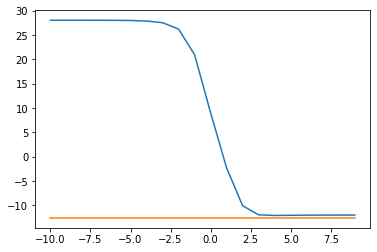

In [90]:
import matplotlib.pyplot as plt

plt.plot(gl,eg)
#plt.plot(gl,eg_h)
plt.plot(gl,eT)

# Save Results

In [40]:
import pickle
#fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

#file_to_store = open(fpath + "Gutz3_tri.pickle", "wb")

#pickle.dump(results, file_to_store)

# Load Results

In [26]:
import pickle
fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

file_to_read = open(fpath + "Gutz3_tri.pickle", "rb")

loaded_results = pickle.load(file_to_read)

In [27]:
u = 1
k = 1
d = 0
N=4
H = M(u) + K(k) + D(d)
e,y = np.linalg.eig(H)
y = np.transpose(y)
arg = np.argsort(e)

i=0
while bkt(y[arg[i]],I(8),psi_spin) < 10**(-5):
    i+=1
print(i,e[arg[0]],e[arg[i]], e[arg[i]]-e[arg[0]])


eg = []
egm = []
gl = []
eT = []
for gi in range(-10,11):
    g = gi
    egl = analyze_energy(g,u,k,d,loaded_results)
    eglm = analyze_energy(g,u,k,d,results)
    eg.append(egl)
    egm.append(eglm)
    gl.append(g)
    eT.append(e[arg[[i]]])

14 (-2.938472193585341e-15-5.595332073399434e-17j) (-7.813741994089484e-16-2.7376237773118545e-16j) (2.1570979941763928e-15-2.178090569971911e-16j)


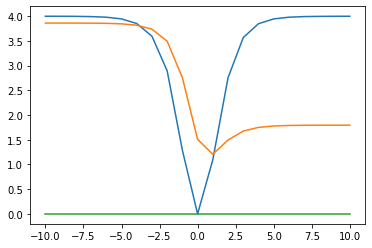

In [112]:
import matplotlib.pyplot as plt

plt.plot(gl,egm)
plt.plot(gl,eg)
plt.plot(gl,eT)

# Find u such the the ground state is the correct state.  

In [28]:
def psi_d(w,u,k,d,N):
    H = M(u) + K(k) + D(d)
    norm = np.sqrt( Mdot([np.conjugate(psi_spin),ln.expm(-H*w),ln.expm(-H*w),psi_spin]) )
    return Mdot([ln.expm(-H*w),psi_spin])/norm

u = -2
k = 1
d = 5
w=10
N=4
H = M(u) + K(k) + D(d)
np.amax(np.abs( Mdot([H,psi_d(w,u,k,d,N)]) - bkt( psi_d(w,u,k,d,N), H, psi_d(w,u,k,d,N) )*psi_d(w,u,k,d,N) ))

1.7763568394002505e-15

In [69]:
def num_d(N):
    out = 0*I(2*N)
    for i in range(N):
        out = out + n(i,2*N)
    return out

def num_u(N):
    out = 0*I(2*N)
    for i in range(N):
        out = out + n(i+N,2*N)
    return out

def num(u,k,d,N):
    H = M(u) + K(k) + D(d)
    e,y = np.linalg.eig(H)
    y = np.transpose(y)
    arg = np.argsort(e)
    psi = y[arg[0]]
    nu = bkt(psi,num_u(N),psi)
    nd = bkt(psi,num_d(N),psi)
    return [nu,nd]

k=1
d = 0
u = 1
N=4
i=0
H = M(u) + K(k) + D(d)
e,y = np.linalg.eig(H)
y = np.transpose(y)
arg = np.argsort(e)
psi = y[arg[i]]
print(e[arg[i]])
print('nu', bkt(psi,num_u(N),psi) )
print('nd', bkt(psi,num_d(N),psi) )

num(u,k,d,N)

(-2.938472193585341e-15-5.595332073399434e-17j)
nu (0.9991705089712188+0j)
nd (1.8262377613763126+0j)


[(0.9991705089712188+0j), (1.8262377613763126+0j)]

In [232]:
def dE(u,k,d,N):
    w=5
    H = M(u) + K(k) + D(d)
    e,y = np.linalg.eig(H)
    y = np.transpose(y)
    arg = np.argsort(e)
    e4 = bkt( psi_d(w,u,k,d,N), H, psi_d(w,u,k,d,N) )
    return e4-e[arg[0]]

k=1
d=2
N=4
ul = [-ui*0.2 + 1.5 for ui in range(28)]
dEl = [dE(u,k,d,N) for u in ul]
nul = [num(u,k,d,N)[0] for u in ul]
ndl = [num(u,k,d,N)[1] for u in ul]

(0.0, 5.0)

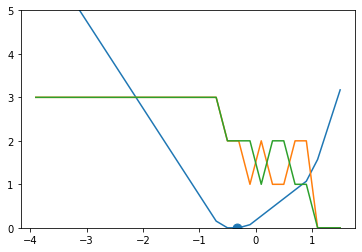

In [233]:
plt.plot(ul,dEl)
plt.plot(ul,nul)
plt.plot(ul,ndl)
plt.scatter([1-2*d/3],[0],s=80)
plt.ylim(0,5)

In [207]:
def find_u(k,d,N):
    ul = [-ui*0.2 + 1.5 for ui in range(28)]
    dEl = [dE(u,k,d,N) for u in ul]
    c1 = 0
    c2 = 0
    for i in range(len(dEl)-1):
        if c1 == 0:
            if dEl[i+1]-dEl[i] > - 0.01:
                uR = ul[i-1]
                c1 = 1
        if c2 == 0:
            if dEl[i+1]-dEl[i] > 0.01:
                uL = ul[i]
                c2 = 1
    return (uL+uR)/2

find_u(1,1,4)

0.3999999999999999

In [211]:
k=1
N=4
udl = []
dl = []
for di in range(0,25):
    d = di*0.2
    u = find_u(k,d,N)
    print(d,u)
    dl.append(d)
    udl.append(u)

0.0 1.0
0.2 1.0
0.4 0.7999999999999999
0.6000000000000001 0.6
0.8 0.6
1.0 0.3999999999999999
1.2000000000000002 0.19999999999999984
1.4000000000000001 0.09999999999999987
1.6 -1.1102230246251565e-16
1.8 -0.10000000000000009
2.0 -0.30000000000000004
2.2 -0.40000000000000013
2.4000000000000004 -0.6000000000000002
2.6 -0.7000000000000001
2.8000000000000003 -0.8000000000000002
3.0 -1.0
3.2 -1.0
3.4000000000000004 -1.2000000000000002
3.6 -1.3000000000000003
3.8000000000000003 -1.4000000000000001
4.0 -1.5000000000000002
4.2 -1.7000000000000002
4.4 -1.8000000000000003
4.6000000000000005 -1.9000000000000004
4.800000000000001 -2.0000000000000004


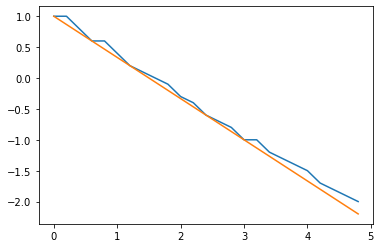

In [216]:
utst = [1-2*d/3 for d in dl]
plt.plot(dl,udl)
plt.plot(dl,utst)

## Small Plot

In [42]:
k = 1
d = 10
N=4
u = 1-2*d/3
print('u = ', u)
H = M(u) + K(k) + D(d)
e,y = np.linalg.eig(H)
y = np.transpose(y)
arg = np.argsort(e)


eg = []
egm = []
gl = []
eT = []
for gi in range(-100,101):
    g = 0.1*gi
    egl = analyze_energy(g,u,k,d,loaded_results)
    eglm = analyze_energy(g,u,k,d,results)
    eg.append(egl)
    egm.append(eglm)
    gl.append(g)
    eT.append(e[arg[[0]]])

u =  -5.666666666666667


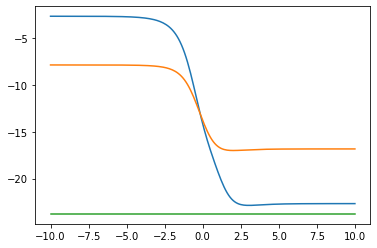

In [43]:
import matplotlib.pyplot as plt

plt.plot(gl,egm)
plt.plot(gl,eg)
plt.plot(gl,eT)

## big plot

In [236]:
k = 1
eq = []
em = []
eh = []
dl = []
for di in range(0,25):
    d = di*0.1
    N=4
    u = 1-2*d/3
    print('u = ', u)
    H = M(u) + K(k) + D(d)
    e,y = np.linalg.eig(H)
    y = np.transpose(y)
    arg = np.argsort(e)



    eg = []
    egm = []
    gl = []
    eT = []
    for gi in range(0,30):
        g = 0.1*gi
        egl = analyze_energy(g,u,k,d,loaded_results)
        eglm = analyze_energy(g,u,k,d,results)
        eg.append(egl)
        egm.append(eglm)
        gl.append(g)
        eT.append(e[arg[[0]]])
    eq.append(min(eg))
    em.append(min(egm))
    eh.append(min(eT))
    dl.append(d)
    print(di,min(eg),min(egm),min(eT))

u =  1.0
0 (1.1729856610451435+0j) (1.3322676295501884e-15+0j) [-2.93847219e-15-5.59533207e-17j]
u =  0.9333333333333333
1 (1.0005866967186943+0j) (-0.14166666666666666+0j) [-0.2+0.j]
u =  0.8666666666666667
2 (0.8274067999760081+0j) (-0.28333333333333066+0j) [-0.4+0.j]
u =  0.7999999999999999
3 (0.6530106029466332+0j) (-0.4290216573047485+0j) [-0.6-4.28165005e-17j]
u =  0.7333333333333334
4 (0.47861440591726445+0j) (-0.5769338975492+0j) [-0.8+2.2212619e-16j]
u =  0.6666666666666667
5 (0.3042182088878913+0j) (-0.7248461377936519+0j) [-1.-1.47540287e-18j]
u =  0.5999999999999999
6 (0.12982201185851786+0j) (-0.872758378038108+0j) [-1.2+1.68850051e-16j]
u =  0.5333333333333332
7 (-0.04524402892615278+0j) (-1.0214784499220246+0j) [-1.4+0.j]
u =  0.4666666666666667
8 (-0.22141221219320395+0j) (-1.1756158280883564+0j) [-1.6-1.7892634e-16j]
u =  0.4
9 (-0.3975803954602507+0j) (-1.3297532062546904+0j) [-1.8+0.j]
u =  0.33333333333333337
10 (-0.573748578727301+0j) (-1.4838905844210237+0j) [-2.0

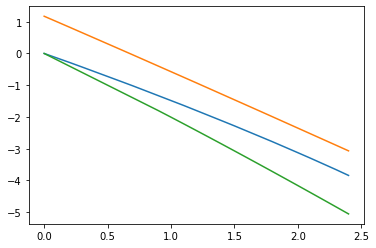

In [237]:
plt.plot(dl,em)
plt.plot(dl,eq)
plt.plot(dl,eh)